In [7]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

f51999f5f297523ab16349d4112bd4ff

In [15]:
od.download("https://www.kaggle.com/datasets/davidcariboo/player-scores")

Skipping, found downloaded files in "./player-scores" (use force=True to force download)


In [31]:
valuations = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/player_valuations.csv')
players = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/players.csv')
competitions = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/competitions.csv')
clubs = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/clubs.csv')

In [32]:
players= pd.read_csv(players)
valuations= pd.read_csv(valuations)
competitions= pd.read_csv(competitions)
clubs= pd.read_csv(clubs)

In [33]:
#current players only
still_playing = players['last_season'] == 2022
players = players[still_playing]
players.head()


,player_id,pretty_name,club_id,club_pretty_name,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,...,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,agent_name,contract_expiration_date,domestic_competition_id,club_name,image_url,last_season,url
19008,519731,Danilo,234,Feyenoord Rotterdam,234,Brazil,Brazil,1999-04-07,Attack,Centre-Forward,...,174,5000000.0,5000000.0,SEG,2026-06-30,NL1,feyenoord-rotterdam,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/danilo/profil/...
19009,552955,Santiago Gimenez,234,Feyenoord Rotterdam,234,Mexico,Argentina,2001-04-18,Attack,Centre-Forward,...,183,6000000.0,6000000.0,CANTERA LATINA / MATIAS BUNGE,2026-06-30,NL1,feyenoord-rotterdam,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/santiago-gimen...
19010,213268,Alireza Jahanbakhsh,234,Feyenoord Rotterdam,234,Iran,Iran,1993-08-11,Attack,Right Winger,...,180,3000000.0,18000000.0,AFFG,2024-06-30,NL1,feyenoord-rotterdam,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/alireza-jahanb...
19011,212391,Roger Marti,1531,Fc Elche,1531,Spain,Spain,1991-01-03,Attack,Centre-Forward,...,179,2500000.0,10000000.0,Promoesport,2026-06-30,ES1,fc-elche,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/roger-marti/pr...
19012,913387,Danylo Kolesnyk,61825,Fk Minaj,61825,Ukraine,NaN,2001-09-22,Attack,Centre-Forward,...,188,50000.0,50000.0,NaN,2024-06-30,UKR1,fk-minaj,https://img.a.transfermarkt.technology/portrai...,2022,https://www.transfermarkt.co.uk/danylo-kolesny...


In [34]:
valuations.head()

,date,datetime,dateweek,player_id,current_club_id,market_value,player_club_domestic_competition_id
0,2013-07-22,2013-07-22,2013-07-22,254016,855,90000,FR1
1,2014-01-14,2014-01-14,2014-01-13,254016,855,90000,FR1
2,2008-08-25,2008-08-25,2008-08-25,51053,23,90000,L1
3,2011-05-30,2011-05-30,2011-05-30,51053,23,90000,L1
4,2011-08-26,2011-08-26,2011-08-22,51053,23,225000,L1


In [35]:
joined = pd.merge(left = players, right = valuations, how = 'inner', on = 'player_id' )
#firsttierplayersonly (revise later if no players)
joined = pd.merge(left = joined, right = clubs, how = 'inner', on = 'club_id' )
joined = pd.merge(left = joined, right = competitions, how = 'inner', left_on='player_club_domestic_competition_id', right_on='competition_id' )

In [36]:
first_tier = joined['sub_type'] == 'first_tier'
toptierplayers = joined[first_tier]

In [42]:
toptierplayers.head()

,player_id,pretty_name_x,club_id,club_pretty_name,current_club_id_x,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,...,type,sub_type,country_id,country_name,country_latitude,country_longitude,domestic_league_code,name,confederation,url
0,519731,Danilo,234,Feyenoord Rotterdam,234,Brazil,Brazil,1999-04-07,Attack,Centre-Forward,...,domestic_league,first_tier,122,Netherlands,52.243498,5.634323,NL1,eredivisie,europa,https://www.transfermarkt.co.uk/eredivisie/sta...
1,519731,Danilo,234,Feyenoord Rotterdam,234,Brazil,Brazil,1999-04-07,Attack,Centre-Forward,...,domestic_league,first_tier,122,Netherlands,52.243498,5.634323,NL1,eredivisie,europa,https://www.transfermarkt.co.uk/eredivisie/sta...
2,519731,Danilo,234,Feyenoord Rotterdam,234,Brazil,Brazil,1999-04-07,Attack,Centre-Forward,...,domestic_league,first_tier,122,Netherlands,52.243498,5.634323,NL1,eredivisie,europa,https://www.transfermarkt.co.uk/eredivisie/sta...
3,519731,Danilo,234,Feyenoord Rotterdam,234,Brazil,Brazil,1999-04-07,Attack,Centre-Forward,...,domestic_league,first_tier,122,Netherlands,52.243498,5.634323,NL1,eredivisie,europa,https://www.transfermarkt.co.uk/eredivisie/sta...
4,519731,Danilo,234,Feyenoord Rotterdam,234,Brazil,Brazil,1999-04-07,Attack,Centre-Forward,...,domestic_league,first_tier,122,Netherlands,52.243498,5.634323,NL1,eredivisie,europa,https://www.transfermarkt.co.uk/eredivisie/sta...


In [45]:
toptierplayers['date'] = pd.to_datetime(toptierplayers['date'], errors='coerce')

In [46]:
toptierplayers['Year']= toptierplayers['date'].dt.year
grouped_multiple = toptierplayers.groupby(['player_id', 'Year']).agg({'market_value': ['mean']})
grouped_multiple.columns = ['market_value_mean']
grouped_multiple['market_value_mean']= grouped_multiple['market_value_mean'].astype(int)
players_avg_value_per_year = grouped_multiple.reset_index()
print(players_avg_value_per_year)

       player_id  Year  market_value_mean
0           2857  2004             100000
1           2857  2005             516666
2           2857  2006             900000
3           2857  2007            1000000
4           2857  2008            1266666
...          ...   ...                ...
47309    1048097  2022              50000
47310    1048954  2022              50000
47311    1050249  2022              75000
47312    1050852  2022              50000
47313    1056907  2022             100000

[47314 rows x 3 columns]


In [47]:
list=[x for x in range(2003, 2022+1)]
WorldCupList = {'World Cup': ['2006','2006','2006','2006', '2010', '2010','2010','2010','2014','2014','2014','2014','2018','2018','2018','2018','2022','2022','2022','2022'], 'Year': list}
WorldCupYears = pd.DataFrame(WorldCupList)  

In [48]:
players_avg_value_per_wc = pd.merge(players_avg_value_per_year, WorldCupYears, left_on='Year', right_on='Year')
players_avg_value_per_wc = players_avg_value_per_wc.groupby(['player_id', 'World Cup']).agg({'market_value_mean': ['mean', 'min', 'max']})
players_avg_value_per_wc.columns = ['market_value_mean', 'market_value_min', 'market_value_max']
players_avg_value_per_wc['market_value_mean']= players_avg_value_per_wc['market_value_mean'].astype(int)
players_avg_value_per_wc = players_avg_value_per_wc.reset_index()

In [49]:
players_avg_value_per_wc

,player_id,World Cup,market_value_mean,market_value_min,market_value_max
0,2857,2006,505555,100000,900000
1,2857,2010,1129166,1000000,1266666
2,2857,2014,708333,500000,1083333
3,2857,2018,681250,425000,1000000
4,2857,2022,477083,225000,750000
...,...,...,...,...,...
14697,1048097,2022,50000,50000,50000
14698,1048954,2022,50000,50000,50000
14699,1050249,2022,75000,75000,75000
14700,1050852,2022,50000,50000,50000


In [50]:
players_avg_value_per_wc = players_avg_value_per_wc.groupby(['player_id', 'World Cup']).agg({'market_value_mean': ['mean', 'min', 'max']})
players_avg_value_per_wc.columns = ['market_value_mean', 'market_value_min', 'market_value_max']
players_avg_value_per_wc = players_avg_value_per_wc.reset_index()

In [51]:
players_avg_value_per_wc

,player_id,World Cup,market_value_mean,market_value_min,market_value_max
0,2857,2006,505555.0,505555,505555
1,2857,2010,1129166.0,1129166,1129166
2,2857,2014,708333.0,708333,708333
3,2857,2018,681250.0,681250,681250
4,2857,2022,477083.0,477083,477083
...,...,...,...,...,...
14697,1048097,2022,50000.0,50000,50000
14698,1048954,2022,50000.0,50000,50000
14699,1050249,2022,75000.0,75000,75000
14700,1050852,2022,50000.0,50000,50000


In [52]:
toptierplayers_per_wc = pd.merge(toptierplayers,players_avg_value_per_wc,on = 'player_id')

In [53]:
toptierplayers_per_wc.columns

Index(['player_id', 'pretty_name_x', 'club_id', 'club_pretty_name',
       'current_club_id_x', 'country_of_citizenship', 'country_of_birth',
       'date_of_birth', 'position', 'sub_position', 'name_x', 'foot',
       'height_in_cm', 'market_value_in_gbp', 'highest_market_value_in_gbp',
       'agent_name', 'contract_expiration_date', 'domestic_competition_id_x',
       'club_name', 'image_url', 'last_season', 'url_x', 'date', 'datetime',
       'dateweek', 'current_club_id_y', 'market_value',
       'player_club_domestic_competition_id', 'name_y', 'pretty_name_y',
       'domestic_competition_id_y', 'total_market_value', 'squad_size',
       'average_age', 'foreigners_number', 'foreigners_percentage',
       'national_team_players', 'stadium_name', 'stadium_seats',
       'net_transfer_record', 'coach_name', 'url_y', 'competition_id',
       'pretty_name', 'type', 'sub_type', 'country_id', 'country_name',
       'country_latitude', 'country_longitude', 'domestic_league_code', 'name',

In [54]:
WC_2022_teams = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']

In [55]:
TopTier_2022_WC_Eligble_Players = toptierplayers_per_wc[toptierplayers_per_wc.country_of_citizenship.isin(WC_2022_teams)]

In [56]:
TopTier_2022_WC_Eligble_Players =TopTier_2022_WC_Eligble_Players[['World Cup','player_id','pretty_name_x','country_of_citizenship','position','sub_position','date_of_birth','name','market_value_mean','market_value_min','market_value_max']]

In [57]:
TopTier_2022_WC_Eligble_Players.head()

,World Cup,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
0,2022,519731,Danilo,Brazil,Attack,Centre-Forward,1999-04-07,eredivisie,2824999.0,2824999,2824999
1,2022,519731,Danilo,Brazil,Attack,Centre-Forward,1999-04-07,eredivisie,2824999.0,2824999,2824999
2,2022,519731,Danilo,Brazil,Attack,Centre-Forward,1999-04-07,eredivisie,2824999.0,2824999,2824999
3,2022,519731,Danilo,Brazil,Attack,Centre-Forward,1999-04-07,eredivisie,2824999.0,2824999,2824999
4,2022,519731,Danilo,Brazil,Attack,Centre-Forward,1999-04-07,eredivisie,2824999.0,2824999,2824999


In [58]:
TopTier_2022_WC_Eligble_Players = TopTier_2022_WC_Eligble_Players.drop_duplicates()

In [59]:
TopTier_2022_WC_Eligble_Players = TopTier_2022_WC_Eligble_Players.sort_values(by='market_value_mean',ascending=False)

In [60]:
TopTier_2022_WC_Eligble_Players.head(20)

,World Cup,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
172148,2022,342229,Kylian Mbappe,France,Attack,Centre-Forward,1998-12-20,ligue-1,175000000.0,175000000,175000000
172194,2018,28003,Lionel Messi,Argentina,Attack,Right Winger,1987-06-24,ligue-1,133333333.0,133333333,133333333
172393,2018,68290,Neymar,Brazil,Attack,Left Winger,1992-02-05,ligue-1,120833333.0,120833333,120833333
186484,2022,132098,Harry Kane,England,Attack,Centre-Forward,1993-07-28,premier-league,118333333.0,118333333,118333333
172394,2022,68290,Neymar,Brazil,Attack,Left Winger,1992-02-05,ligue-1,118250000.0,118250000,118250000
172193,2014,28003,Lionel Messi,Argentina,Attack,Right Winger,1987-06-24,ligue-1,112500000.0,112500000,112500000
203871,2022,88755,Kevin De Bruyne,Belgium,Attack,Attacking Midfield,1991-06-28,premier-league,109791666.0,109791666,109791666
197572,2022,134425,Raheem Sterling,England,Attack,Left Winger,1994-12-08,premier-league,108416666.0,108416666,108416666
91354,2022,200512,Sadio Mane,Senegal,Attack,Left Winger,1992-04-10,bundesliga,97499999.0,97499999,97499999
204250,2022,401173,Jadon Sancho,England,Attack,Left Winger,2000-03-25,premier-league,95270833.0,95270833,95270833


In [61]:
TopTier_2022_WC_Eligble_Players[TopTier_2022_WC_Eligble_Players['player_id'].isin([50202])]

,World Cup,player_id,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max
40341,2018,50202,Eden Hazard,Belgium,Attack,Left Winger,1991-01-07,laliga,82541666.0,82541666,82541666
40342,2022,50202,Eden Hazard,Belgium,Attack,Left Winger,1991-01-07,laliga,65358333.0,65358333,65358333
40340,2014,50202,Eden Hazard,Belgium,Attack,Left Winger,1991-01-07,laliga,35791666.0,35791666,35791666
40339,2010,50202,Eden Hazard,Belgium,Attack,Left Winger,1991-01-07,laliga,6700000.0,6700000,6700000


## EA Sports FIFA Ratings

In [63]:
od.download("https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  mallomi


Your Kaggle Key:

  ········


100%|██████████| 2.25M/2.25M [00:00<00:00, 3.40MB/s]

In [31]:
valuations = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/player_valuations.csv')
players = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/players.csv')
competitions = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/competitions.csv')
clubs = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/player-scores/clubs.csv')

In [65]:
fifa23data = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/fifa-23-players-dataset/Fifa 23 Players Data.csv')
fifa23= pd.read_csv(fifa23data)

In [72]:
print(fifa23.columns)

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [74]:
fifa23 = fifa23[['Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position', 'Club Jersey Number',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves','International Reputation', 
        'National Team Name','National Team Image Link', 'National Team Position',
       'National Team Jersey Number','Finishing','Short Passing', 'Sprint Speed', 'Stamina', 'Strength', 'Penalties']]

In [75]:
fifa23.head(5)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Finishing,Short Passing,Sprint Speed,Stamina,Strength,Penalties
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,90,91,76,70,68,75
1,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,...,France,https://cdn.sofifa.net/flags/fr.png,ST,19,92,89,80,82,82,84
2,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,...,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,94,84,75,76,87,90
3,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,85,93,73,88,74,83
4,Kylian Mbappe,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,France,https://cdn.sofifa.net/flags/fr.png,ST,10,93,85,97,87,76,80


In [76]:
fifa23['Full Name']= fifa23['Full Name'].astype(str)
cols = ['Full Name']
fifa23[cols] = fifa23[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_5938/256333578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa23['Full Name']= fifa23['Full Name'].astype(str)
/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_5938/256333578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa23[cols] = fifa23[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))


fifa23merged['include']=
if fifa23merged['Version'] =='Rare':1
    elif fifa23merged['Version'] =='Normal';1
    else 0

In [79]:
fifa23merged = pd.merge(left = fifa23, right = TopTier_2022_WC_Eligble_Players, how = 'inner', left_on='Full Name', right_on='pretty_name_x' )

## Player Ratings Based on Transfer Value

In [80]:
fifa23merged['rank'] = fifa23merged['market_value_mean'].rank(ascending=False)

In [81]:
fifa23merged['rank']= fifa23merged['rank'].astype(int)

In [83]:
fifa23merged = fifa23merged.sort_values(by='rank',ascending=True)
fifa23merged.head(10)

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max,rank
18,Kylian Mbappe,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,Kylian Mbappe,France,Attack,Centre-Forward,1998-12-20,ligue-1,175000000.0,175000000,175000000,1
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Lionel Messi,Argentina,Attack,Right Winger,1987-06-24,ligue-1,133333333.0,133333333,133333333,2
29,Harry Kane,89,89,105500000,ST,ST,England,https://cdn.sofifa.net/players/202/126/23_60.png,28,188,...,Harry Kane,England,Attack,Centre-Forward,1993-07-28,premier-league,118333333.0,118333333,118333333,3
1,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Lionel Messi,Argentina,Attack,Right Winger,1987-06-24,ligue-1,112500000.0,112500000,112500000,4
14,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,Kevin De Bruyne,Belgium,Attack,Attacking Midfield,1991-06-28,premier-league,109791666.0,109791666,109791666,5
77,Raheem Sterling,86,86,72500000,"LW,RW",LW,England,https://cdn.sofifa.net/players/202/652/23_60.png,27,170,...,Raheem Sterling,England,Attack,Left Winger,1994-12-08,premier-league,108416666.0,108416666,108416666,6
32,Sadio Mane,89,89,99500000,"LM,CF",LM,Senegal,https://cdn.sofifa.net/players/208/722/23_60.png,30,174,...,Sadio Mane,Senegal,Attack,Left Winger,1992-04-10,bundesliga,97499999.0,97499999,97499999,7
239,Jadon Sancho,84,88,61500000,"LW,RW,LM",CAM,England,https://cdn.sofifa.net/players/233/049/23_60.png,22,180,...,Jadon Sancho,England,Attack,Left Winger,2000-03-25,premier-league,95270833.0,95270833,95270833,8
2,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Lionel Messi,Argentina,Attack,Right Winger,1987-06-24,ligue-1,93583333.0,93583333,93583333,9
203,Eden Hazard,84,84,35000000,LW,LW,Belgium,https://cdn.sofifa.net/players/183/277/23_60.png,31,175,...,Eden Hazard,Belgium,Attack,Left Winger,1991-01-07,laliga,82541666.0,82541666,82541666,10


In [84]:
N = len(fifa23merged)

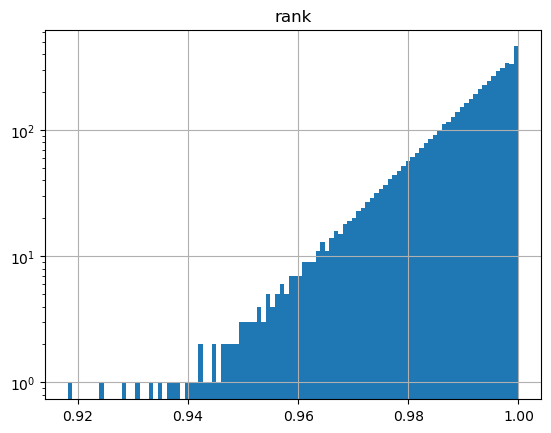

In [85]:
pd.DataFrame(np.power(fifa23merged['rank'].astype(float)/fifa23merged['rank'].max(), 0.01)).hist(bins=100)
plt.yscale('log')

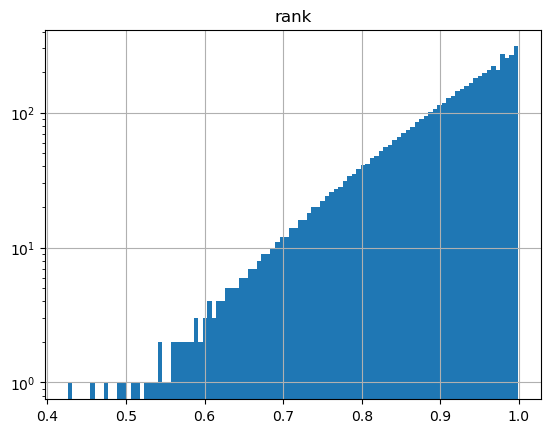

In [86]:
pd.DataFrame(np.power(fifa23merged['rank']/N, 0.1)).hist(bins=100)
plt.yscale('log')

In [87]:
fifa23merged

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),...,pretty_name_x,country_of_citizenship,position,sub_position,date_of_birth,name,market_value_mean,market_value_min,market_value_max,rank
18,Kylian Mbappe,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,Kylian Mbappe,France,Attack,Centre-Forward,1998-12-20,ligue-1,175000000.0,175000000,175000000,1
0,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Lionel Messi,Argentina,Attack,Right Winger,1987-06-24,ligue-1,133333333.0,133333333,133333333,2
29,Harry Kane,89,89,105500000,ST,ST,England,https://cdn.sofifa.net/players/202/126/23_60.png,28,188,...,Harry Kane,England,Attack,Centre-Forward,1993-07-28,premier-league,118333333.0,118333333,118333333,3
1,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Lionel Messi,Argentina,Attack,Right Winger,1987-06-24,ligue-1,112500000.0,112500000,112500000,4
14,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,Kevin De Bruyne,Belgium,Attack,Attacking Midfield,1991-06-28,premier-league,109791666.0,109791666,109791666,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048,Tom Roufosse,58,67,400000,GK,GK,Belgium,https://cdn.sofifa.net/players/263/533/23_60.png,21,180,...,Tom Roufosse,Belgium,Goalkeeper,NaN,2001-03-28,jupiler-pro-league,25000.0,25000,25000,5112
1039,Diego Demme,77,77,9000000,"CDM,CM",CDM,Germany,https://cdn.sofifa.net/players/202/325/23_60.png,30,172,...,Diego Demme,Germany,Midfield,Defensive Midfield,1991-11-21,serie-a,25000.0,25000,25000,5112
3227,Django Warmerdam,70,71,1700000,LWB,LWB,Netherlands,https://cdn.sofifa.net/players/234/195/23_60.png,26,180,...,Django Warmerdam,Netherlands,Defender,Left-Back,1995-09-02,eredivisie,25000.0,25000,25000,5112
5042,Miliano Jonathans,58,76,525000,"RW,CAM",CAM,Netherlands,https://cdn.sofifa.net/players/268/727/23_60.png,18,178,...,Miliano Jonathans,Netherlands,Attack,Right Winger,2004-04-05,eredivisie,25000.0,25000,25000,5112


In [49]:
germany = fifa23merged['country_of_citizenship']=='Germany'
germany = fifa23merged[germany]


In [91]:
pd.set_option('display.max_columns', None)
germany.head()

NameError: name 'germany' is not defined